<a href="https://colab.research.google.com/github/ihsraham/TensorFlow/blob/main/Medical_cost_prediction_(Multi_parameter_regression_problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical cost prediction

### We will use a given publicly avilable dataset to accept `age`, `sex`, `bmi`, `number_of_children`, `whether_a_smoker` and `region` as features and train a neural network to predict the medical charges. This is an example of supervised learning.

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

 [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance) on Kaggle.
 
 On [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets).

Raw: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We can see that columns `sex`, `smoker` and `region` has strings as data. Neural nets can't process non-numerical inputs. 


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.


In [4]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




Now we'll split data into features (`X`) and labels (`y`).


In [6]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


We could manually split X & y to training and test sets but instead we could use the `train_test_split` from Scikit-Learn.

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [10]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [11]:
1338 * 0.8

1070.4

In [12]:
1338 * 0.2

267.6

Now that our dataset is ready, we can create a model and fit it on the training data.

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
imodel = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
imodel.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["mae"])

# 3. Fit the model
imodel_fit = imodel.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.9727 - mae: 13342.9727
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13329.9717 - mae: 13329.9717
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13315.9346 - mae: 13315.9346
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13300.0146 - mae: 13300.0146
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13281.5713 - mae: 13281.5713
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13260.0322 - mae: 13260.0322
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13235.2822 - mae: 13235.2822
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13207.1514 - mae: 13207.1514
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13175.4482 - mae: 13175.4482
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13140.17

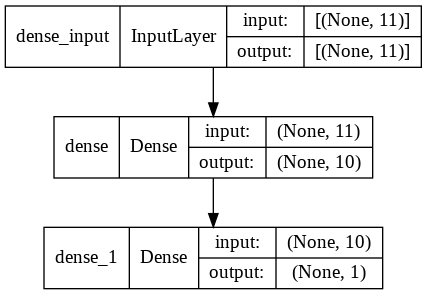

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model=imodel, show_shapes=True)

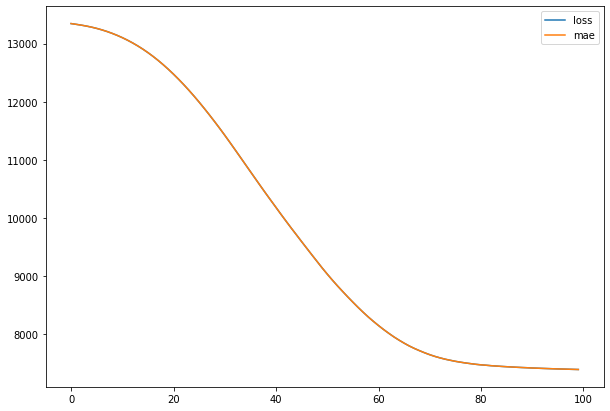

In [61]:
pd.DataFrame(imodel_fit.history).plot(figsize=(10,7))

In [16]:
imodel.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7539.9517 - mae: 7539.9517


[7539.95166015625, 7539.95166015625]

### Our model is incorrect by over $7500. It needs a lot of improvement.

We could expect improvement by:

1. Increasing the duration of training from 100 to 200 epochs.
2. Increasing the number of layers, reducing `learning_rate`.
3. ..

In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
imodel_1 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
imodel_1.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae"])

# 3. Fit the model, this time for 200 epochs
imodel_1_fit = imodel_1.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13342.9727 - mae: 13342.9727
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13329.9717 - mae: 13329.9717
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13315.9346 - mae: 13315.9346
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13300.0146 - mae: 13300.0146
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13281.5713 - mae: 13281.5713
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13260.0322 - mae: 13260.0322
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 13235.2822 - mae: 13235.2822
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 13207.1514 - mae: 13207.1514
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 13175.4482 - mae: 13175.4482
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 13140.17

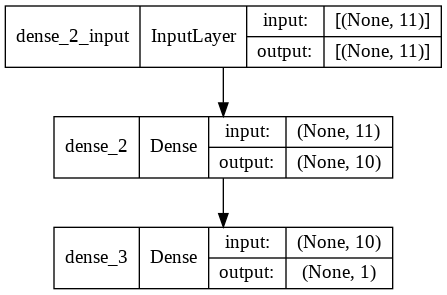

In [19]:
plot_model(model=imodel_1, show_shapes=True)

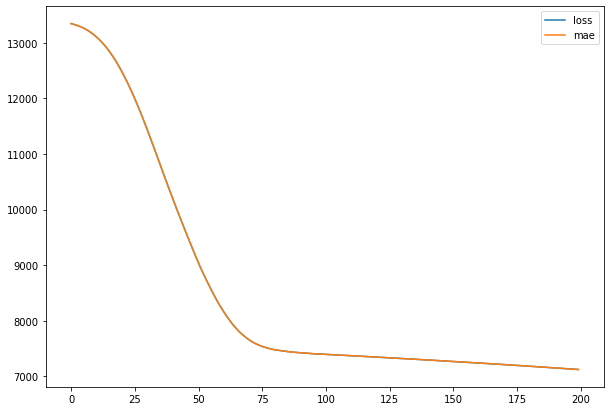

In [62]:
pd.DataFrame(imodel_1_fit.history).plot(figsize=(10,7))

In [21]:
imodel_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7190.7910 - mae: 7190.7910


[7190.791015625, 7190.791015625]

Let's change the number of layers of our model

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
imodel_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(50),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

# 2. Compile the model
imodel_2.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae"])

# 3. Fit the model
imodel_2_fit = imodel_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13301.2471 - mae: 13301.2471
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13211.3701 - mae: 13211.3701
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13053.6133 - mae: 13053.6133
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12760.2500 - mae: 12760.2500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12248.9893 - mae: 12248.9893
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 11437.4453 - mae: 11437.4453
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 10341.6475 - mae: 10341.6475
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 9156.1631 - mae: 9156.1631
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8141.5298 - mae: 8141.5298
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7583.1777 - 

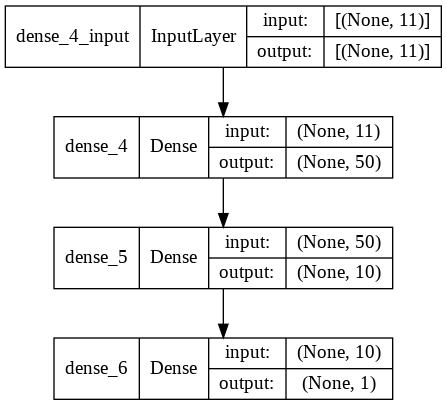

In [24]:
plot_model(model=imodel_2, show_shapes=True)

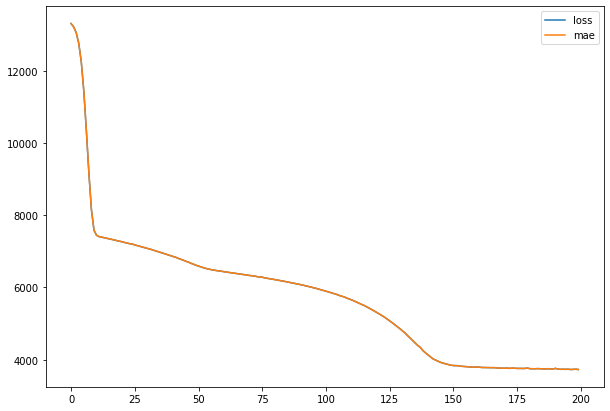

In [63]:
pd.DataFrame(imodel_2_fit.history).plot(figsize=(10,7))

In [26]:
imodel_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3599.9282 - mae: 3599.9282


[3599.92822265625, 3599.92822265625]

Let's add another layer but this time we will also add non-linear activation function to the layers, to improve the training.

In [30]:
tf.random.set_seed(42)

imodel_3 = tf.keras.Sequential(
    [tf.keras.layers.Dense(50, activation="tanh"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1, activation="relu")]
)

imodel_3.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae"])

imodel_3_fit = imodel_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13344.4561 - mae: 13344.4561
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13339.9482 - mae: 13339.9482
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13330.8193 - mae: 13330.8193
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13317.1133 - mae: 13317.1133
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13296.6328 - mae: 13296.6328
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13266.9346 - mae: 13266.9346
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 13224.7520 - mae: 13224.7520
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 13166.6328 - mae: 13166.6328
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 13090.1416 - mae: 13090.1416
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12993.04

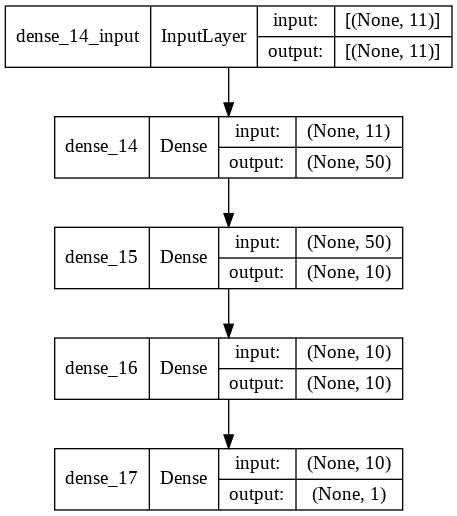

In [32]:
plot_model(model=imodel_3, show_shapes=True)

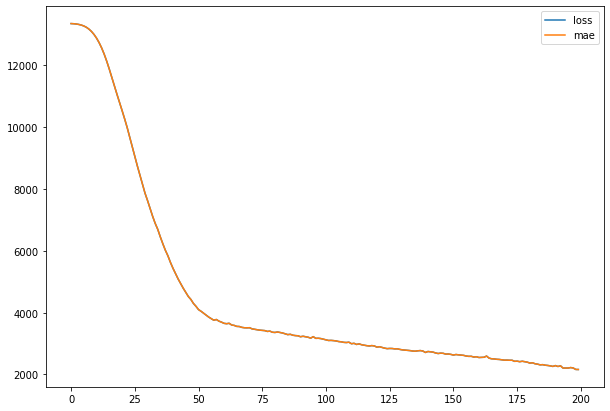

In [64]:
pd.DataFrame(imodel_3_fit.history).plot(figsize=(10,7))

In [39]:
imodel_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1470.1100 - mae: 1470.1100


[1470.1099853515625, 1470.1099853515625]

### We can see here that the loss is still decreasing, that means we could have trained it for longer to get lower loss metrics. Let's do that next.

In [38]:
tf.random.set_seed(42)

imodel_4 = tf.keras.Sequential(
    [tf.keras.layers.Dense(50, activation="tanh"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1, activation="relu")]
)

imodel_4.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae"])

imodel_4_fit = imodel_4.fit(X_train, y_train, epochs=700)

Epoch 1/700
34/34 [==============================] - 1s 2ms/step - loss: 13344.4561 - mae: 13344.4561
Epoch 2/700
34/34 [==============================] - 0s 2ms/step - loss: 13339.9482 - mae: 13339.9482
Epoch 3/700
34/34 [==============================] - 0s 2ms/step - loss: 13330.8193 - mae: 13330.8193
Epoch 4/700
34/34 [==============================] - 0s 2ms/step - loss: 13317.1133 - mae: 13317.1133
Epoch 5/700
34/34 [==============================] - 0s 2ms/step - loss: 13296.6328 - mae: 13296.6328
Epoch 6/700
34/34 [==============================] - 0s 2ms/step - loss: 13266.9346 - mae: 13266.9346
Epoch 7/700
34/34 [==============================] - 0s 2ms/step - loss: 13224.7520 - mae: 13224.7520
Epoch 8/700
34/34 [==============================] - 0s 2ms/step - loss: 13166.6328 - mae: 13166.6328
Epoch 9/700
34/34 [==============================] - 0s 2ms/step - loss: 13090.1416 - mae: 13090.1416
Epoch 10/700
34/34 [==============================] - 0s 2ms/step - loss: 12993.04

In [40]:
imodel_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1470.1100 - mae: 1470.1100


[1470.1099853515625, 1470.1099853515625]

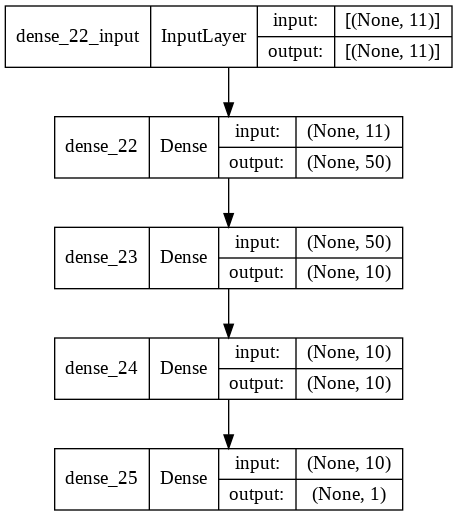

In [44]:
plot_model(model=imodel_4, show_shapes=True)

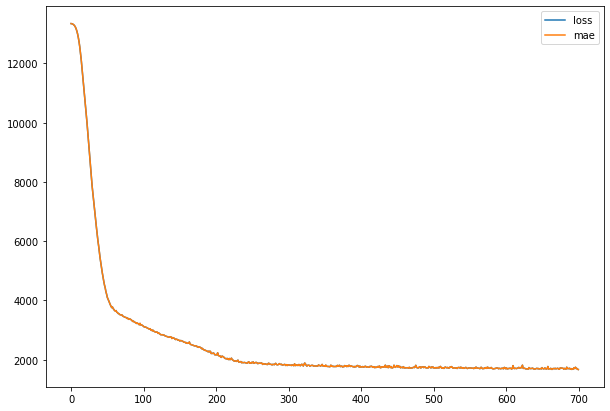

In [65]:
pd.DataFrame(imodel_4_fit.history).plot(figsize=(10,7))

### We could see that the loss curve is plateauing out. How to find out the perfect duration for training? Secondly, when the loss curve is stagnant, would it require a lower learning rate so as to decrease further?

### For that we have TensorFlow callbacks

In [46]:
'''
  ReduceLROnPlateau reduces the learning rate on repeated stagnant losses.
  
  monitor: Which function to check the plateau for?
  mode: Whether to minmimize or maximize the function?
  factor: if loss is stagnant, by what factor the LR should be reduced. (if factor=0.1, lr=0.01 => lr=0.001 if loss is stagnant)
  patience: how long(epochs) to tolerate the stagnancy?
  verbose: verbosity of the function, how often it prints the status of the callback function?
  min_lr: what would be the lower limit of LR?
'''

cb_reducelr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    mode='min',
    factor=0.1,
    patience=10,
    verbose=1,
    min_lr=0.000001
)

In [53]:
'''
  EarlyStopping callback is useful when we wish to stop training when loss stops decreasing

  monitor: Which function to check the plateau for?
  mode: Whether to minmimize or maximize the function?
  min_delta: Minimum change to be shown by the loss function for the training to continue.
  patience: how long(epochs) to tolerate the stagnancy?
  verbose: verbosity of the function, how often it prints the status of the callback function?
'''

cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    min_delta=0.001,
    patience=10,
    verbose=1
)

### Let's use our TensorFlow callbacks

In [66]:
tf.random.set_seed(42)

imodel_5 = tf.keras.Sequential(
    [tf.keras.layers.Dense(50, activation="tanh"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(10, activation="relu"),
     tf.keras.layers.Dense(1, activation="relu")]
)

imodel_5.compile(loss="mae",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae"])

imodel_5_fit = imodel_5.fit(X_train, y_train, epochs=1000, callbacks=[cb_reducelr, cb_earlystop])

Epoch 1/1000
34/34 [==============================] - 1s 3ms/step - loss: 13344.4561 - mae: 13344.4561 - lr: 0.0010
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13339.9482 - mae: 13339.9482 - lr: 0.0010
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 13330.8193 - mae: 13330.8193 - lr: 0.0010
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 13317.1133 - mae: 13317.1133 - lr: 0.0010
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 13296.6328 - mae: 13296.6328 - lr: 0.0010
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 13266.9346 - mae: 13266.9346 - lr: 0.0010
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 13224.7520 - mae: 13224.7520 - lr: 0.0010
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 13166.6328 - mae: 13166.6328 - lr: 0.0010
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss

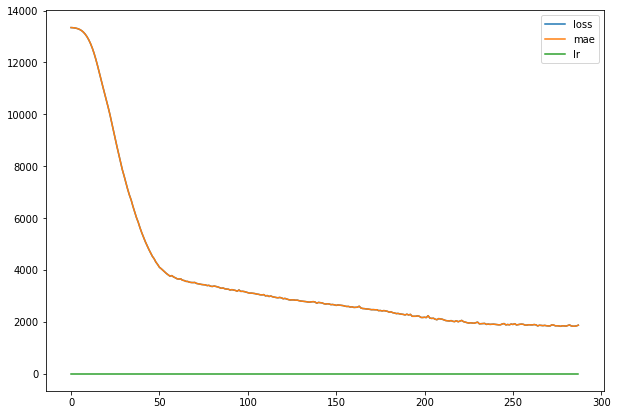

In [60]:
pd.DataFrame(imodel_5_fit.history).plot(figsize=(10,7))